In [ ]:
!pip install kagglehub tensorflow opencv-python nibabel numpy scikit-learn


In [ ]:
from google.colab import files
upload = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
import os
import shutil

# Create the Kaggle directory and move your kaggle.json there
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
shutil.copy("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))

# Set permissions (for Linux/Colab)
os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)


In [ ]:
!pip install -q kaggle


In [ ]:
!kaggle datasets download -d borhanitrash/alzheimer-mri-disease-classification-dataset


Dataset URL: https://www.kaggle.com/datasets/borhanitrash/alzheimer-mri-disease-classification-dataset
License(s): apache-2.0
  0% 0.00/26.0M [00:00<?, ?B/s]
100% 26.0M/26.0M [00:00<00:00, 1.07GB/s]


In [ ]:
import os

for root, dirs, files in os.walk("alzheimer_dataset"):
    print(root)
    for name in dirs:
        print("📂", name)
    for name in files:
        print("📄", name)
    break  # only show top level


In [ ]:
import os

In [ ]:
import zipfile
import os

zip_file_path = '/content/alzheimer-mri-disease-classification-dataset.zip'
extract_dir = '/content/alzheimer_dataset_extracted' # Choose a suitable directory name

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Dataset unzipped to: {extract_dir}")

Dataset unzipped to: /content/alzheimer_dataset_extracted


In [ ]:
import os

# List the contents of the extracted directory
extracted_dataset_path = '/content/alzheimer_dataset_extracted' # Use the same directory name as in the previous cell

print(f"Contents of {extracted_dataset_path}:")
for root, dirs, files in os.walk(extracted_dataset_path):
    level = root.replace(extracted_dataset_path, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 4 * (level + 1)
    for d in dirs:
        print(f'{subindent}{d}/')
    for f in files:
        print(f'{subindent}{f}')

Contents of /content/alzheimer_dataset_extracted:
alzheimer_dataset_extracted/
    Alzheimer MRI Disease Classification Dataset/
    Alzheimer MRI Disease Classification Dataset/
        Data/
        README.md
        Data/
            train-00000-of-00001-c08a401c53fe5312.parquet
            test-00000-of-00001-44110b9df98c5585.parquet


In [ ]:
from datasets import load_dataset

# Path to your local extracted dataset (the folder that has parquet files)
data_root = "/content/alzheimer_dataset_extracted/Alzheimer MRI Disease Classification Dataset/Data/"

# Load train split
ds_train = load_dataset(path=data_root, split="train")

# Inspect dataset structure
print("Dataset columns:", ds_train.column_names)
print("Number of samples:", len(ds_train))

# Label feature info
label_feature = ds_train.features["label"]
print("Label feature:", label_feature)

# Manually define class names (assuming standard Alzheimer's classification categories)
class_names = ["Non Demented", "Mild Demented", "Moderate Demented", "Very Mild Demented"]

# All possible classes
print("\nClass labels mapping:")
# Check if the label index is within the bounds of class_names
for idx in range(len(class_names)):
    print(f"{idx}: {class_names[idx]}")

# Peek at a few samples
print("\nSample records:")
for i in range(min(3, len(ds_train))): # Ensure we don't try to access more samples than exist
    rec = ds_train[i]
    # Check if the label index is within the bounds of class_names before accessing
    label_name = class_names[rec['label']] if rec['label'] < len(class_names) else f"Unknown ({rec['label']})"
    print(f"Image type: {type(rec['image'])}, Label index: {rec['label']}, Class: {label_name}")

Dataset columns: ['image', 'label']
Number of samples: 5120
Label feature: Value('int64')

Class labels mapping:
0: Non Demented
1: Mild Demented
2: Moderate Demented
3: Very Mild Demented

Sample records:
Image type: <class 'dict'>, Label index: 2, Class: Moderate Demented
Image type: <class 'dict'>, Label index: 0, Class: Non Demented
Image type: <class 'dict'>, Label index: 3, Class: Very Mild Demented


Train: (5120, 176, 176, 3) (5120,)
Test : (1280, 176, 176, 3) (1280,)
Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.4760 - loss: 1.1257 - val_accuracy: 0.5342 - val_loss: 0.8976
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.5626 - loss: 0.9126 - val_accuracy: 0.6074 - val_loss: 0.8755
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.6188 - loss: 0.8197 - val_accuracy: 0.6777 - val_loss: 0.6846
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.7059 - loss: 0.6585 - val_accuracy: 0.7793 - val_loss: 0.5349
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.7658 - loss: 0.5166 - val_accuracy: 0.8213 - val_loss: 0.4117
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.8422 - loss: 0.3530 - val_accuracy: 0.8398 - val_loss: 0.3835
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.8971 - loss: 0.2509 - val_accuracy: 0.9160 - val_loss: 0.2170
Epoch 8/10
128/128 ━━━━━━━━

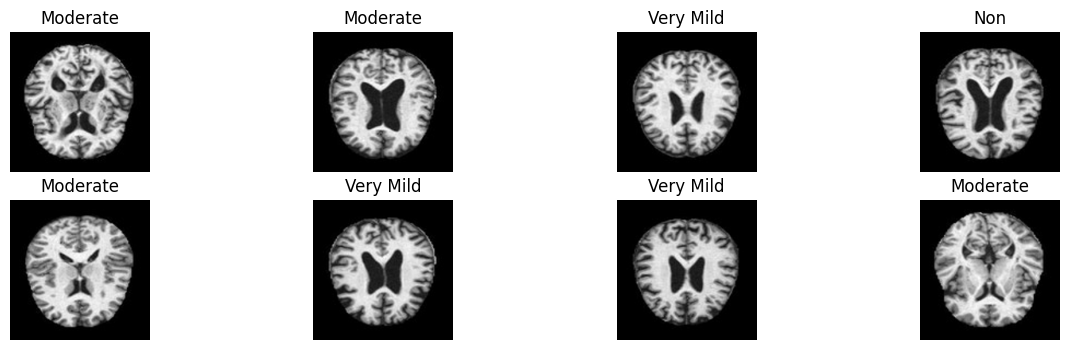

In [ ]:
# ================================
# Alzheimer MRI - ANN + CNN Pipeline
# ================================

import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
from tensorflow.keras import layers, models, optimizers, losses, metrics, Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, mean_absolute_error
import PIL.Image
import io

# -------------------------------
# 1. Load dataset
# -------------------------------
data_root = "/content/alzheimer_dataset_extracted/Alzheimer MRI Disease Classification Dataset/Data/"
dataset = load_dataset(path=data_root)

# Convert splits to numpy
def dataset_to_numpy(ds, img_size=(176, 176)):
    images, labels = [], []
    for row in ds:
        # Load image from bytes using PIL
        img = PIL.Image.open(io.BytesIO(row["image"]["bytes"])).convert("RGB").resize(img_size)
        images.append(np.array(img) / 255.0)
        labels.append(row["label"])
    return np.array(images, dtype=np.float32), np.array(labels, dtype=np.int64)

X_train, y_train = dataset_to_numpy(dataset["train"])
X_test, y_test = dataset_to_numpy(dataset["test"])

print("Train:", X_train.shape, y_train.shape)
print("Test :", X_test.shape, y_test.shape)

# -------------------------------
# 2. CNN Model for Classification
# -------------------------------
num_classes = len(np.unique(y_train))

# Define CNN model with explicit Input layer
inputs = layers.Input(shape=X_train.shape[1:])
x = layers.Conv2D(32, (3,3), activation="relu")(inputs)
x = layers.MaxPooling2D(2,2)(x)
x = layers.Conv2D(64, (3,3), activation="relu")(x)
x = layers.MaxPooling2D(2,2)(x)
x = layers.Conv2D(128, (3,3), activation="relu")(x)
x = layers.MaxPooling2D(2,2)(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

cnn = Model(inputs=inputs, outputs=outputs)


cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

history = cnn.fit(X_train, y_train,
                  validation_split=0.2,
                  epochs=10,
                  batch_size=32)

# Evaluate CNN
cnn_eval = cnn.evaluate(X_test, y_test, verbose=0)
print("\nCNN Test Accuracy:", cnn_eval[1])
y_pred_cnn = np.argmax(cnn.predict(X_test), axis=1)
print(classification_report(y_test, y_pred_cnn, target_names=[
    "Non Demented", "Mild Demented", "Moderate Demented", "Very Mild Demented"
]))

# -------------------------------
# 3. Extract Embeddings
# -------------------------------
feature_extractor = Model(inputs=cnn.input,
                          outputs=cnn.layers[-2].output)
train_embeddings = feature_extractor.predict(X_train)
test_embeddings = feature_extractor.predict(X_test)

print("Embeddings shape:", train_embeddings.shape)

# -------------------------------
# 4. ANN Model for Regression + Classification
# -------------------------------
# Map labels to severity scores
severity_map = {0:0, 1:1, 2:2, 3:3}
y_train_reg = np.array([severity_map[l] for l in y_train])
y_test_reg = np.array([severity_map[l] for l in y_test])

# Scale embeddings
scaler = StandardScaler()
train_emb_scaled = scaler.fit_transform(train_embeddings)
test_emb_scaled = scaler.transform(test_embeddings)

# ANN model
inputs = layers.Input(shape=(train_emb_scaled.shape[1],))
x = layers.Dense(64, activation="relu")(inputs)
x = layers.Dropout(0.3)(x)
out_reg = layers.Dense(1, activation="linear", name="regression")(x)
out_clf = layers.Dense(num_classes, activation="softmax", name="classification")(x)

ann = Model(inputs, [out_reg, out_clf])
ann.compile(
    optimizer="adam",
    loss={"regression": "mse", "classification": "sparse_categorical_crossentropy"},
    metrics={"regression": "mae", "classification": "accuracy"}
)

ann.fit(train_emb_scaled,
        {"regression": y_train_reg, "classification": y_train},
        validation_split=0.2,
        epochs=20,
        batch_size=32)

# Evaluate ANN
reg_pred, clf_pred = ann.predict(test_emb_scaled)
reg_mae = mean_absolute_error(y_test_reg, reg_pred)
clf_acc = np.mean(np.argmax(clf_pred, axis=1) == y_test)

print("\nANN Regression MAE:", reg_mae)
print("ANN Classification Accuracy:", clf_acc)

# -------------------------------
# 5. MRI Data Analysis (Visualization)
# -------------------------------
def plot_samples(X, y, class_names, n=8):
    plt.figure(figsize=(15, 4))
    idxs = np.random.choice(len(X), n, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(2, n//2, i+1)
        plt.imshow(X[idx])
        plt.title(class_names[y[idx]])
        plt.axis("off")
    plt.show()

plot_samples(X_train, y_train, ["Non", "Mild", "Moderate", "Very Mild"])

In [ ]:
# ================================
# Save and Download Models in Colab
# ================================
import shutil
from google.colab import files

# -------------------------------
# 1. Save CNN model
# -------------------------------
cnn.save("cnn_mri_model.keras")        # Keras native format
cnn.export("cnn_mri_model_tf")         # SavedModel format

# -------------------------------
# 2. Save ANN model
# -------------------------------
ann.save("ann_mri_model.keras")
ann.export("ann_mri_model_tf")

print("✅ Models saved successfully!")

# -------------------------------
# 3. Zip SavedModel folders
# -------------------------------
shutil.make_archive("cnn_mri_model_tf", 'zip', "cnn_mri_model_tf")
shutil.make_archive("ann_mri_model_tf", 'zip', "ann_mri_model_tf")

print("✅ Models zipped successfully!")

# -------------------------------
# 4. Download files
# -------------------------------
files.download("cnn_mri_model.keras")
files.download("ann_mri_model.keras")
files.download("cnn_mri_model_tf.zip")
files.download("ann_mri_model_tf.zip")

Saved artifact at 'cnn_mri_model_tf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 176, 176, 3), dtype=tf.float32, name='keras_tensor_11')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  132429083860560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132429083861136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132429083866704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132429083859024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132429083866896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132429083864976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132429083868624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132429083868240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132429119288720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132429083868048: TensorSpec(shape=(), dtype=tf.resource, name=None)
Saved artifac

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>